# Car Price Analysis and Prediction


## Overview:

The CW dataset is about Car Price. You are supposed to predict the car prices based on 
a set of predictors. In the original dataset, there are more than 20 predictors, but you we choose 
only ten of them for the analysis. This is due the practicality, as more predictors means more 
plots, and more writings, and more features to work with, etc. Choose the predictors either by 
common sense, or after an initial modelling.

## 1. Data Preprocessing

In [31]:
# Import packages
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import matplotlib.cm as cm
from custom_plots import plot_props
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import shap

# Ignore FutureWarnings
warnings.filterwarnings("ignore", 
                         category = FutureWarning)  

# Ignore SettingWithCopyWarning
warnings.simplefilter(action="ignore", 
                       category = pd.errors.SettingWithCopyWarning) 

# # Ignore UserWarning
# warnings.simplefilter(action="ignore", 
#                       category = UserWarning) 

### 1.1. The Cars Dataset

In [32]:
# Import the Dataset
df_org = pd.read_csv('Car_price_2024.csv')

In [33]:
df_org

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,Nissan Altima,2007,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,8005.469674,two,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000,36245.697
1,Toyota Corolla,2019,Electric,Manual,4.0,Excellent,Beige,Yes,No,Yes,...,25385.241860,two,-0.001383,2.696626,3543.00629,182.1,60.0,894.742606,4689,10736.91127
2,Honda CR-V,2004,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,6553.601733,three,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190,41953.92523
3,Toyota Corolla,2020,Electric,Manual,4.0,Good,Brown,Yes,Yes,Yes,...,24381.083350,three,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720,12446.97569
4,Toyota Tundra,2017,Hybrid,Automatic,4.0,Good,Brown,Yes,No,No,...,28357.830640,five,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559,10560.54904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Chevrolet Sonic,2013,Electric,Automatic,4.0,Good,Silver,Yes,No,No,...,15164.228470,two,0.013213,2.238645,4157.519949,194.4,71.1,2051.008598,4685,24612.10317
2226,Honda Fit,2007,Petrol,Manual,4.0,Good,Black,No,No,Yes,...,6250.307375,two,0.014196,2.283821,3058.960939,194.4,68.4,2965.163102,4977,35581.95722
2227,Chevrolet Sonic,2012,Hybrid,Automatic,20.0,Excellent,Yellow,No,No,No,...,21614.535620,four,-0.006004,2.355598,3503.415954,146.5,66.9,1300.819060,5891,15609.82872
2228,Nissan Titan,2003,Petrol,Manual,4.0,Good,Brown,No,No,No,...,8373.305539,three,-0.018665,1.944553,3748.991341,169.6,70.6,3053.176775,4502,36638.1213


In [34]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2227 non-null   object 
 3   Transmission       2223 non-null   object 
 4   DoorsNum           2223 non-null   float64
 5   Condition          2230 non-null   object 
 6   Color              2228 non-null   object 
 7   Cruise             2230 non-null   object 
 8   Leather_Seats      2230 non-null   object 
 9   Heated_Seats       2230 non-null   object 
 10  Navigation         2230 non-null   object 
 11  Owners             2230 non-null   int64  
 12  Insurance          2230 non-null   object 
 13  Service_History    2230 non-null   object 
 14  Safety             2230 non-null   object 
 15  Premium_Sound      2230 non-null   object 
 16  Multimedia         2230 

### 1.2. Feature Selections

Choose `only ten` of them for the coursework, based on:

- https://www.sciencedirect.com/science/article/pii/S0957417424025077
- https://www.investopedia.com/articles/investing/090314/just-what-factors-value-your-used-car.asp


In [35]:
# All Features:
df_org.columns

Index(['Model', 'Year', 'Fuel_Type', 'Transmission', 'DoorsNum', 'Condition',
       'Color', 'Cruise', 'Leather_Seats', 'Heated_Seats', 'Navigation',
       'Owners', 'Insurance', 'Service_History', 'Safety', 'Premium_Sound',
       'Multimedia', 'Bluetooth', 'Wheel', 'Sunroof', 'Warranty', 'TAge',
       'Price', 'Cylinder_Numbers', 'Credit_History', 'Engine_Size', 'Weight',
       'carlength', 'carwidth', 'monthly_mileage', 'peakrpm',
       'Estimated_Mileage'],
      dtype='object')

In [36]:
# Selected Features
# Saftety is significance but the dataset shows to many Unrated/Unknown value, then it cannot be used
# Only get the brand from the 'Model', and use 'Model' create a new variable 'Type' of Body Type

feature = ['Model', 'Year', 'Fuel_Type', 
           'Transmission', 'Condition',
           'Price', 'Cylinder_Numbers', 
           'Engine_Size', 'Estimated_Mileage', 
           'Warranty', 'peakrpm', 'Owners']

In [37]:
### Use 'Model' create a new variable 'Type' of Body Type since the articles shown their importance

# First, get all the models and parse to https://www.autotrader.co.uk/ for its body type, this is done manually.
# However, in future uses, if there are too many model, an better approach is implement a web scrapping module using Selenium or Beautifulsoup to 
# perform automatically

df = df_org[feature] # Main Dataset for the Analysis
df['Model'].value_counts() # Shows all Models and its count

Model
Ford Fusion           194
Toyota Tundra         193
Honda Pilot           188
Ford Escape           167
Chevrolet Volt        163
Honda Fit             137
Chevrolet Sonic       133
Toyota Corolla        126
Toyota Prius          104
Nissan 350Z           103
Nissan Juke            95
Ford Mustang           86
Nissan Murano          85
Nissan Altima          82
Honda Accord           73
Chevrolet Bolt         69
Nissan Titan           60
Chevrolet Impala       35
Toyota Camry           35
Chevrolet Corvette     31
Nissan GT-R            25
Chevrolet Camaro       24
Honda CR-V             19
Toyota Camary           3
Name: count, dtype: int64

In [38]:
# Replace 'Toyota Camary' to 'Toyota Camry' in  Model
df['Model'] = df['Model'].replace('Toyota Camary', 'Toyota Camry')

# Body Types map
bodytype_map = {'Ford Fusion'       : 'Hatchback',
                'Toyota Tundra'     : 'Truck',
                'Honda Pilot'       : 'SUV',
                'Ford Escape'       : 'SUV',
                'Chevrolet Volt'    : 'Hatchback',
                'Honda Fit'         : 'Hatchback',
                'Chevrolet Sonic'   : 'Hatchback',
                'Toyota Corolla'    : 'Saloon',
                'Toyota Prius'      : 'Hatchback',
                'Nissan 350Z'       : 'Coupe',
                'Nissan Juke'       : 'SUV',
                'Ford Mustang'      : 'Coupe',
                'Nissan Murano'     : 'SUV',
                'Nissan Altima'     : 'Saloon',
                'Honda Accord'      : 'Saloon',
                'Chevrolet Bolt'    : 'Hatchback',
                'Nissan Titan'      : 'Truck',
                'Chevrolet Impala'  : 'Saloon',
                'Toyota Camry'      : 'Saloon',
                'Chevrolet Corvette': 'Coupe',
                'Nissan GT-R'       : 'Coupe',
                'Chevrolet Camaro'  : 'Coupe',
                'Honda CR-V'        : 'SUV'  
                }

# Apply the mapping
df['Body'] = df['Model'].map(bodytype_map)

In [39]:
# Split 'Model' to 'Made' and 'Model', keep 'Made' only in for the later analysis
df[['Made', 'Model']] = df['Model'].str.split(pat=' ', n=1, expand=True)
df = df.drop(columns = 'Model')

# Reorder columns to move 'Made' to the first position
df = df[['Body'] + [col for col in df.columns if col != 'Body']]
df = df[['Made'] + [col for col in df.columns if col != 'Made']]

In [40]:
# Show The Analysis Dataset
df

,Made,Body,Year,Fuel_Type,Transmission,Condition,Price,Cylinder_Numbers,Engine_Size,Estimated_Mileage,Warranty,peakrpm,Owners
0,Nissan,Saloon,2007,Petrol,Manual,Fair,8005.469674,two,1.655688,36245.697,7,6000,2
1,Toyota,Saloon,2019,Electric,Manual,Excellent,25385.241860,two,2.696626,10736.91127,20,4689,1
2,Honda,SUV,2004,Petrol,Manual,Fair,6553.601733,three,1.642471,41953.92523,12,5190,4
3,Toyota,Saloon,2020,Electric,Manual,Good,24381.083350,three,2.044309,12446.97569,8,5720,1
4,Toyota,Truck,2017,Hybrid,Automatic,Good,28357.830640,five,2.586011,10560.54904,35,4559,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Chevrolet,Hatchback,2013,Electric,Automatic,Good,15164.228470,two,2.238645,24612.10317,11,4685,4
2226,Honda,Hatchback,2007,Petrol,Manual,Good,6250.307375,two,2.283821,35581.95722,32,4977,2
2227,Chevrolet,Hatchback,2012,Hybrid,Automatic,Excellent,21614.535620,four,2.355598,15609.82872,30,5891,1
2228,Nissan,Truck,2003,Petrol,Manual,Good,8373.305539,three,1.944553,36638.1213,26,4502,3


### 1.3. Handling Missing Values

Number of Nulls:

In [41]:
# Number of Missing values
df.isna().sum()

Made                 0
Body                 0
Year                 0
Fuel_Type            3
Transmission         7
Condition            0
Price                0
Cylinder_Numbers     0
Engine_Size          0
Estimated_Mileage    0
Warranty             0
peakrpm              0
Owners               0
dtype: int64

Drop all Records with Nulls as there're not to many, imputation is uncessary:

In [42]:
# Since they're not many, drop records with missing values
df.dropna(inplace = True)

### 1.4. Handling Categorical Values

In [43]:
cat = ['Made', 'Fuel_Type', 'Transmission', 'Condition', 'Cylinder_Numbers'] # Categoricals
num = [col for col in df.columns if col not in cat] # Numeric

Unique values count of each categorical variable:

In [44]:
# Show unique value of each categorical
for col in cat:
    unique = df[col].value_counts()
    print(unique)

Made
Toyota       460
Chevrolet    453
Nissan       447
Ford         446
Honda        414
Name: count, dtype: int64
Fuel_Type
Petrol      980
Hybrid      732
Electric    498
Petroll      10
Name: count, dtype: int64
Transmission
Manual         1574
Automatic       643
Na                2
AutoNamatic       1
Name: count, dtype: int64
Condition
Good          1293
Fair           579
Excellent      335
Exc              7
Excellent!       6
Name: count, dtype: int64
Cylinder_Numbers
two      677
three    615
six      282
five     248
four     172
4        111
3         84
5         31
Name: count, dtype: int64


Correct labels of each variable:

In [45]:
# drop two rows where 'Transmission' is 'na'
df = df[df['Transmission'] != 'Na']

# Replace 'Petroll' to 'Petrol' in  Fuel_Type
df['Fuel_Type'] = df['Fuel_Type'].replace('Petroll', 'Petrol')

# Replace 'AutoNamatic' to 'Automatic' in  'Transmission'
df['Transmission'] = df['Transmission'].replace('AutoNamatic', 'Automatic')

# Replace 'Exc' and 'Excellent!' to 'Excellent' in  'Condition'
df['Condition'] = df['Condition'].replace(['Exc', 'Excellent!'], 'Excellent')

# Mapping of text to numbers
cylinder_map = {
    'two'   : 2,
    'three' : 3,
    'four'  : 4,
    'five'  : 5,
    'six'   : 6
}

# Replace using the map
df['Cylinder_Numbers'] = df['Cylinder_Numbers'].replace(cylinder_map)
df['Cylinder_Numbers'] = df['Cylinder_Numbers'].astype(int) # Cast to Int

# Update Categoricals and Numeric columns
cat = ['Made', 'Body', 'Fuel_Type', 'Transmission', 'Condition'] # Categoricals
num = [col for col in df.columns if col not in cat] # Numeric

Visualise Corrected Categorical Variables:
It looks like they're all evenly distributed, without signigicant imbalance

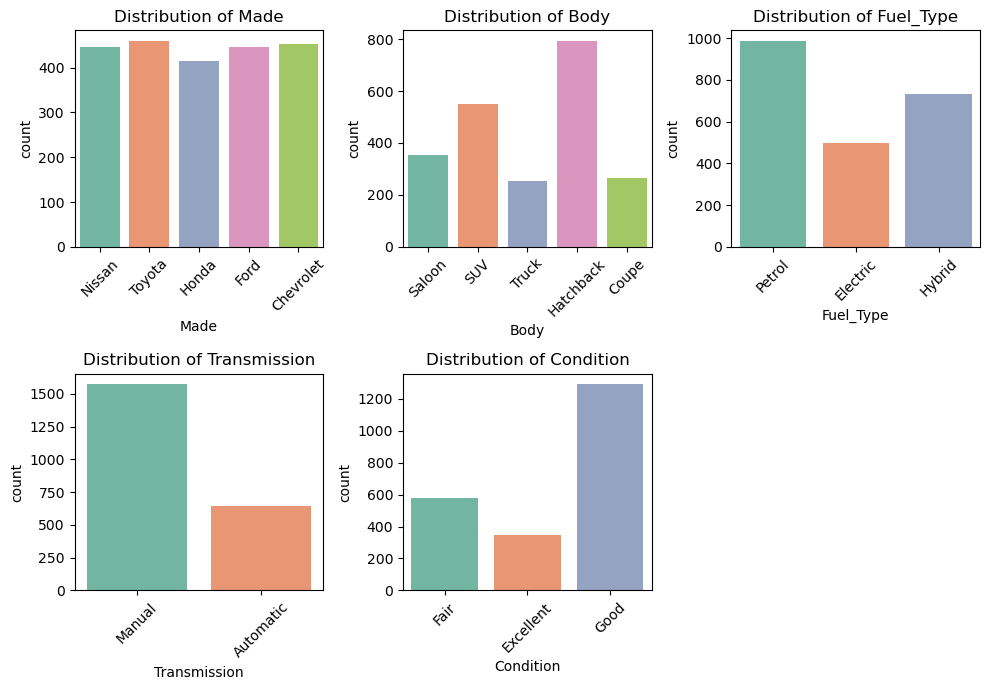

In [46]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop over each column and generate a countplot
for i, (ax, col) in enumerate(zip(axes, cat)):
    sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if there are fewer than 6 categorical columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 1.5. Handling Numeric Values (Outliers addressing)

Distribution of Numeric Variables:

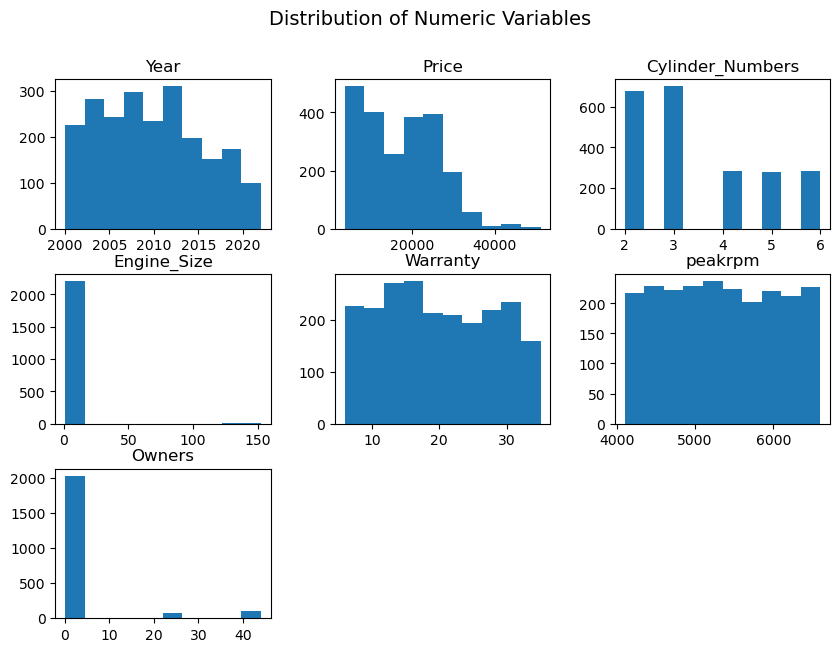

In [47]:
df[num].hist(figsize = (10, 7),
             grid    = False);
# Add a suptitle
plt.suptitle('Distribution of Numeric Variables', 
             fontsize = 14)

# Show the plot
plt.show()

In [48]:
# Handle Estimated_Mileage as it contains characters

# Filter rows where 'Estimated_Mileage' is non-numeric
non_numeric_rows = df[~df['Estimated_Mileage'].apply(pd.to_numeric, errors='coerce').notnull()]

# Identify rows that contain 'km' in 'Estimated_Mileage'
km_rows = non_numeric_rows[non_numeric_rows['Estimated_Mileage'].str.contains('km', na=False)]

# Remove 'km' and convert to numeric
km_rows['Estimated_Mileage'] = km_rows['Estimated_Mileage'].str.replace('km', '', regex=False)
km_rows['Estimated_Mileage'] = pd.to_numeric(km_rows['Estimated_Mileage'], errors='coerce')

# Convert from kilometers to miles
km_rows['Estimated_Mileage'] = km_rows['Estimated_Mileage'] * 0.621371

# Update the main dataframe with converted values for these rows
df.update(km_rows)

# Convert 'Estimated_Mileage' to Int
df['Estimated_Mileage'] = df['Estimated_Mileage'].astype(float) 

C:\Users\blueb\AppData\Local\Temp\ipykernel_19560\2452817860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(num))


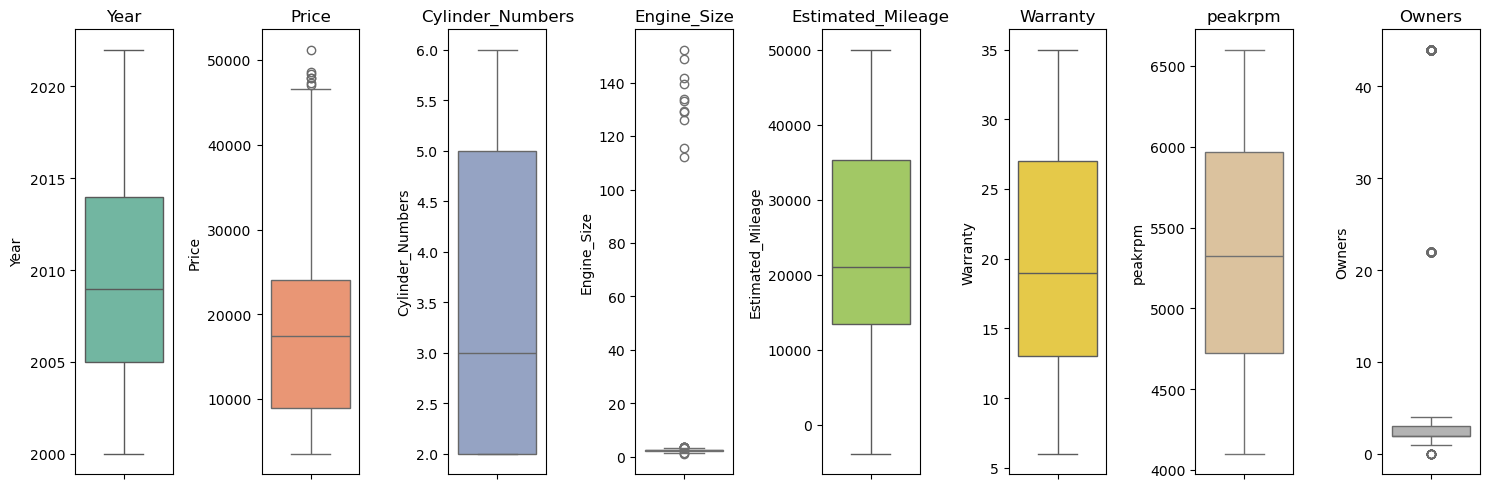

In [49]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Get the colormap
cmap = cm.get_cmap('Set2', len(num))  

# Loop through the 'num' list and create a box plot for each variable
for i, col in enumerate(num):
    plt.subplot(1, len(num), i + 1) 
    sns.boxplot(y=df[col], color=cmap(i))
    plt.title(col)

# Show the plot
plt.tight_layout()
plt.show()

In [50]:
df['Estimated_Mileage'] = df['Estimated_Mileage'].abs()

#### It seems like `Engine_Size` have many incorrect values as Outliers, then we will address them:

In [51]:
# Engine_Size Outliers
# Calculate the IQR for the 'Engine_Size' column

def outlier_detect(dataset, column, u_bound, l_bound):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# Engine_Size' Bounds
lower_bound, upper_bound = outlier_detect(df, 'Engine_Size', 1.5, 1.5)

# Identify rows where 'Engine_Size' is outside the bounds
outlier_rows = df[(df['Engine_Size'] < lower_bound) | (df['Engine_Size'] > upper_bound)]
outlier_rows['Engine_Size']

27        3.415848
691       3.531227
1411      1.177304
1423      1.182286
1439      3.376456
1548      3.600000
1761      3.402744
1811      3.504715
1931      3.440988
2100      1.000000
2130    139.613045
2131    152.348978
2132    115.409965
2133    112.171323
2134    133.199896
2135    141.818134
2136    128.878471
2137    133.732414
2138    129.317994
2139    126.160931
2140    148.700921
2167      3.588757
Name: Engine_Size, dtype: float64

In [52]:
# Drop these which larger than 4 only as they're cannot be corrected
df = df[df['Engine_Size'] < 4]

#### Address the Outliers in `Owners`:

In [53]:
# Engine_Size' Bounds
lower_bound, upper_bound = outlier_detect(df, 'Owners', 1.5, 1.5)

# Filter out rows where 'Price' is outside the bounds
upper_outlier_rows = df[(df['Owners'] > upper_bound)]
lower_outlier_rows = df[(df['Owners'] < lower_bound)]

# Display the upper outlier rows
upper_outlier_rows['Owners'].value_counts()

Owners
44    110
22     76
Name: count, dtype: int64

It seems like there are many records incorrectly have their Owners as 44 instead of 4, 22 instead of 2. Then they need to be corrected:

In [54]:
# Correct Owner Nums
df['Owners'] = df['Owners'].replace({44: 4, 22: 2})

In [55]:
# Show lower Outliers
lower_outlier_rows

,Made,Body,Year,Fuel_Type,Transmission,Condition,Price,Cylinder_Numbers,Engine_Size,Estimated_Mileage,Warranty,peakrpm,Owners
2156,Toyota,Hatchback,2006,Hybrid,Automatic,Good,23924.382640,4,1.955089,13146.61353,12,5316,0
2158,Ford,Hatchback,2018,Electric,Automatic,Good,26865.556550,4,2.491935,12329.98909,13,4714,0
2160,Nissan,SUV,2009,Petrol,Manual,Good,10332.634820,2,1.596265,31617.35146,32,5920,0
2168,Honda,Hatchback,2005,Petrol,Manual,Fair,6372.511978,2,2.589483,41933.97426,14,5118,0
2184,Nissan,Truck,2008,Petrol,Manual,Good,10024.114340,3,1.358040,29357.20931,17,4634,0
2185,Chevrolet,Coupe,2006,Electric,Manual,Good,16910.203760,6,1.778535,19115.49048,30,5732,0
2194,Nissan,Truck,2005,Petrol,Manual,Fair,7714.226763,3,2.149443,38597.61688,28,4464,0
2195,Nissan,SUV,2011,Petrol,Manual,Fair,13788.635100,6,2.257614,30667.08783,20,5220,0
2206,Ford,Coupe,2014,Hybrid,Manual,Good,22338.985770,6,2.305851,14136.89579,9,5162,0
2222,Toyota,Saloon,2018,Electric,Automatic,Good,22716.617330,3,2.607664,13795.79610,6,4591,0


As they're used cars, past owners number of `0` seem incorrect. Then we will drop them.

In [56]:
df = df[df['Owners'] >= lower_bound]

#### Address the Outliers in `Price`:

In [57]:
# show outlier rows in 'Price' column
# Calculate the IQR for the 'Price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Price' is outside the bounds
outlier_rows = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the outlier rows
outlier_rows

,Made,Body,Year,Fuel_Type,Transmission,Condition,Price,Cylinder_Numbers,Engine_Size,Estimated_Mileage,Warranty,peakrpm,Owners
953,Toyota,Saloon,2005,Electric,Manual,Good,48611.41971,6,2.322836,5670.212833,13,6475,2
1439,Toyota,Truck,2013,Electric,Automatic,Excellent,51219.22066,6,3.376456,7379.710155,7,5685,2
1536,Toyota,Saloon,2019,Hybrid,Automatic,Excellent,47931.01785,6,3.272544,4405.182167,30,5149,1
1548,Toyota,Saloon,2022,Hybrid,Automatic,Good,47325.42798,6,3.600000,4494.655732,17,5260,1
1811,Toyota,Saloon,2018,Hybrid,Manual,Excellent,48348.75147,6,3.504715,1366.477254,29,4870,1
1971,Toyota,Saloon,2005,Hybrid,Manual,Excellent,47838.48156,6,3.212827,1126.803719,27,6277,1


The asking price for these old cars are too high, seeming impractical, we drop them as well.

In [58]:
# Drop rows where 'Price' is outside the bounds
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

### 1.6 The Cleaned Dataset

In [59]:
# Show Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Made               2190 non-null   object 
 1   Body               2190 non-null   object 
 2   Year               2190 non-null   int64  
 3   Fuel_Type          2190 non-null   object 
 4   Transmission       2190 non-null   object 
 5   Condition          2190 non-null   object 
 6   Price              2190 non-null   float64
 7   Cylinder_Numbers   2190 non-null   int64  
 8   Engine_Size        2190 non-null   float64
 9   Estimated_Mileage  2190 non-null   float64
 10  Warranty           2190 non-null   int64  
 11  peakrpm            2190 non-null   int64  
 12  Owners             2190 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 239.5+ KB


C:\Users\blueb\AppData\Local\Temp\ipykernel_19560\2185994716.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(num))


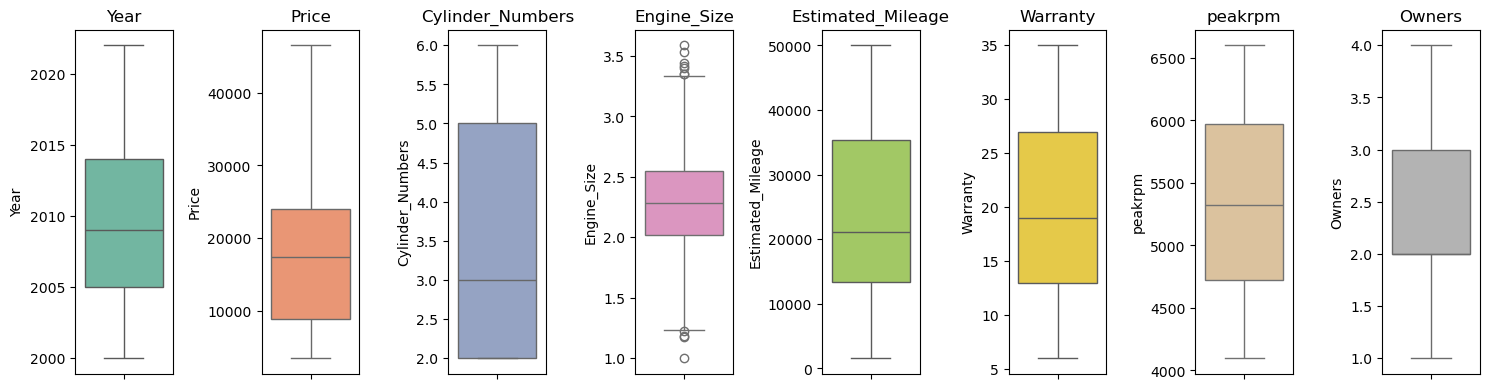

In [60]:
# Show Box plots of Numerical again
plt.figure(figsize=(15, 4))

# Get the colormap
cmap = cm.get_cmap('Set2', len(num))  

# Loop through the 'num' list and create a box plot for each variable
for i, col in enumerate(num):
    plt.subplot(1, len(num), i + 1) 
    sns.boxplot(y=df[col], color=cmap(i))
    plt.title(col)

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
# Reset Cleaned Data index
df.reset_index(drop=True, inplace=True)

# Export to .csv for Visualisation
df.to_csv('car_price_2024_visual.csv', index = False)

## 2. EDA

### 2.1. Decriptive Analysis

In [62]:
df_eda = df.copy()

# Define the bins and labels
bins = [0, 10000, 20000, 30000, 40000, float('inf')]
labels = ['< £10k', '£10k–£20k', '£20k–£30k', '£30k–£40k', '> £40k']

# Create the new price range column
df_eda['Price_Range'] = pd.cut(df_eda['Price'], bins=bins, labels=labels, right=False)

# Create 'Used_Years' column based on 'Year' column
df_eda['Used_Years'] = 2025 - df_eda['Year']

# Create the new ranges for 'Used_Years'
bins = [0, 5, 7, 10, 15, float('inf')]
labels = ['0-5', '5-7', '7-10', '10-15', '15+']

# Assign the categories based on 'Used_Years' values to a new column
df_eda['Used_Years'] = pd.cut(df_eda['Used_Years'], bins=bins, labels=labels, right=False)

**`Price` by `Made`:**

In [63]:
# Descriptive Statistics by Made
price_stats_by_made = df_eda.groupby('Made')['Price'].describe()
price_stats_by_made

,count,mean,std,min,25%,50%,75%,max
Made,,,,,,,,
Chevrolet,448.0,18028.758529,3738.853018,5441.557488,15947.172738,17807.492845,20021.836633,35161.439970
Ford,442.0,23980.899267,4297.694009,12001.895360,21096.214567,23866.483185,26553.556343,42628.531150
Honda,412.0,6213.611881,1018.310352,3527.516896,5465.018035,6216.252299,6895.314104,8887.312415
Nissan,438.0,9665.612243,1566.879330,5038.270190,8630.935664,9596.906176,10877.550415,13185.683630
Toyota,450.0,26994.500446,5979.990790,8390.957883,23443.993870,26484.557785,30097.324975,46526.624040


**`Price` by `Type`:**

In [64]:
# Descriptive Statistics by Type
price_stats_by_type = df_eda.groupby('Body')['Price'].describe()
price_stats_by_type

,count,mean,std,min,25%,50%,75%,max
Body,,,,,,,,
Coupe,262.0,15199.870431,6801.660691,5156.261132,9526.928680,12718.576530,20527.072865,42628.53115
Hatchback,787.0,18653.801282,7397.820663,3894.720913,15233.561760,19078.500020,23382.756725,45168.20930
SUV,550.0,12943.257800,7992.780720,3527.516896,6582.217940,9586.859538,20832.926812,33199.12329
Saloon,345.0,17690.217600,10321.296219,3796.988479,7697.054058,17556.995840,26370.357830,45794.89186
Truck,246.0,23303.610695,9391.416295,5416.486808,16057.213397,24994.648040,29076.982447,46526.62404


**`Price` by `Fuel_Type`:**

In [65]:
# Descriptive Statistics by Made
price_stats_by_Fuel_Type = df_eda.groupby('Fuel_Type')['Price'].describe()
price_stats_by_Fuel_Type

,count,mean,std,min,25%,50%,75%,max
Fuel_Type,,,,,,,,
Electric,492.0,21844.405678,6525.914098,10102.599310,17149.032083,21537.282370,26341.282293,46526.62404
Hybrid,721.0,24469.329515,5592.085924,13614.675840,20696.175730,24018.929940,27324.732170,45794.89186
Petrol,977.0,9444.911546,4463.654481,3527.516896,6400.992586,8331.607099,10916.494690,35766.56753


**`Price` by `Condition`:**

In [66]:
# Descriptive Statistics by Made
price_stats_by_Condition = df_eda.groupby('Condition')['Price'].describe()
price_stats_by_Condition

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Excellent,340.0,26971.662608,4950.021996,20004.813660,23202.937290,26099.617740,30198.587590,46526.62404
Fair,571.0,10554.711658,5518.672540,3527.516896,6276.973602,8510.282795,15375.232135,36955.28366
Good,1279.0,17529.638086,8243.990796,4091.243226,9741.247430,17605.198280,23980.476305,45794.89186


**`Price` by `Transmission`:**

In [67]:
# Descriptive Statistics by Made
price_stats_by_Transmission = df_eda.groupby('Transmission')['Price'].describe()
price_stats_by_Transmission

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Automatic,634.0,23100.584973,6090.027111,12065.353270,18495.621687,22643.730785,26542.929925,46526.62404
Manual,1556.0,14763.330258,8620.370202,3527.516896,7347.833295,11130.731045,21811.745913,45794.89186


### 2.2. Price Ranges vs. other Factors

**`Price Range` by `Body`:**

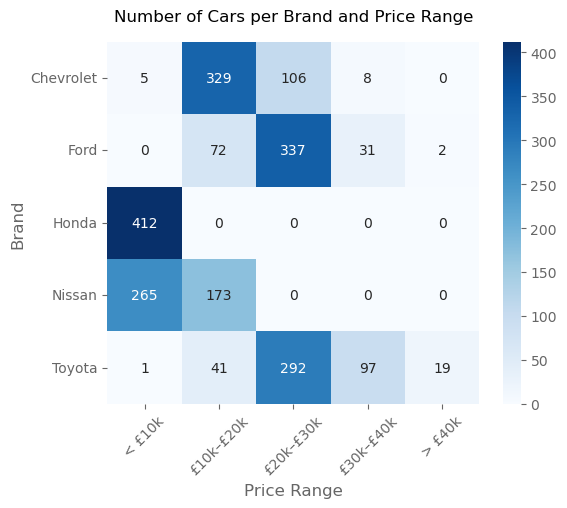

In [68]:
def plot_heatmap_counts(df, row_col, col_col, custom_order=None, figsize=(6, 5), cmap='Blues'):
    """
    Plots a heatmap of counts based on two categorical columns in a DataFrame.

    Parameters:
        df (DataFrame): The dataset.
        row_col (str): The column to appear on the y-axis (rows).
        col_col (str): The column to appear on the x-axis (columns).
        custom_order (list, optional): Custom order for y-axis (rows). Defaults to None.
        figsize (tuple): Size of the figure. Defaults to (6, 5).
        cmap (str): Colour map for heatmap. Defaults to 'Blues'.
    """

    # Group and pivot the data
    heatmap_data = df.groupby([row_col, col_col]).size().unstack(fill_value=0)

    # Reorder the rows if custom order is provided
    if custom_order is not None:
        heatmap_data = heatmap_data.reindex(custom_order)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt='d')

    # Apply custom styling for labels and ticks with #666666
    plt.gca().tick_params(axis="x", colors="#666666")  # X-axis ticks
    plt.gca().tick_params(axis="y", colors="#666666")  # Y-axis ticks

    # Set axis labels with #666666 (excluding the main title)
    plt.xlabel(row_col, fontsize=12, color="#666666")
    plt.ylabel(col_col, fontsize=12, color="#666666")

    # Set colorbar ticks and labels to match the styling
    colorbar = plt.gca().collections[0].colorbar
    colorbar.ax.tick_params(axis="y", colors="#666666")  # Colorbar ticks


plot_heatmap_counts(df_eda, row_col='Made',col_col='Price_Range', figsize=(6, 4.7))
# Rotate the y-axis labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Number of Cars per Brand and Price Range', pad=15)
plt.ylabel('Brand')
plt.xlabel('Price Range')
plt.show()

**`Price Range` by `Type`:**

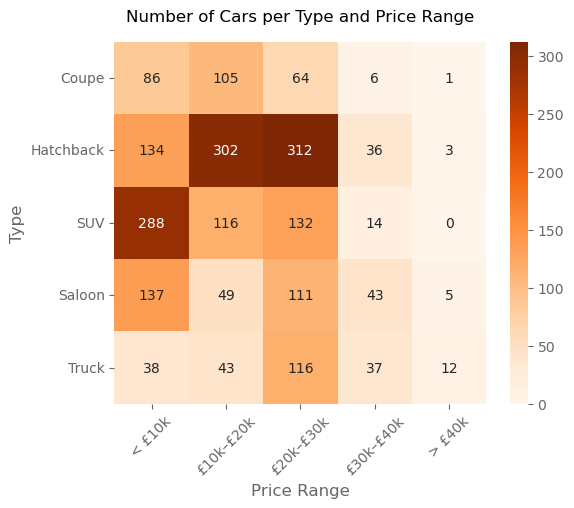

In [69]:
plot_heatmap_counts(df_eda, row_col='Body', col_col='Price_Range', figsize=(6, 4.7), cmap='Oranges')
# Rotate the y-axis labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Number of Cars per Type and Price Range', pad=15)
plt.ylabel('Type')
plt.xlabel('Price Range')
plt.show()

**`Price Range` by `Condition`:**

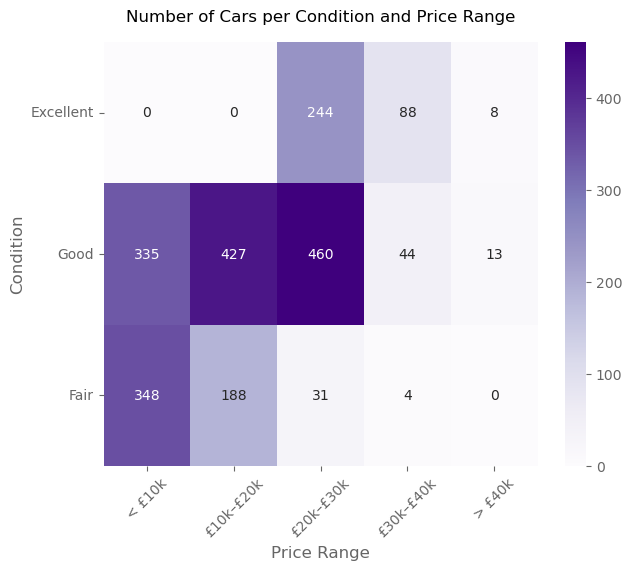

In [70]:
plot_heatmap_counts(df_eda, row_col='Condition', col_col='Price_Range', figsize=(7, 5.5), cmap='Purples', custom_order = ['Excellent', 'Good', 'Fair'])
# Rotate the y-axis labels
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Number of Cars per Condition and Price Range', pad=15)
plt.ylabel('Condition')
plt.xlabel('Price Range')
plt.show()

### 2.3. Average Price of Diffrent Factors

In [71]:
def plot_avg_price_heatmap(df, row_col, col_col, value_col='Price', custom_order=None, figsize=(6, 5), cmap='YlGnBu'):
    """
    Plots a heatmap of average prices in £K with 1 decimal places
    Parameters:
    - df: DataFrame
    - row_col: the column to be shown on the y-axis
    - col_col: the column to be shown on the x-axis
    - value_col: column containing numerical values to average (default = 'Price')
    - custom_order: custom order of y-axis labels (rows)
    - figsize: size of the plot
    - cmap: colour palette for the heatmap
    """

    # Create pivot table for average price
    heatmap_data = df.groupby([row_col, col_col])[value_col].mean().unstack(fill_value=0)

    # Reorder rows if a custom order is given
    if custom_order:
        heatmap_data = heatmap_data.reindex(custom_order)

    # Format annotations as £X.XXK
    annotations = heatmap_data.applymap(lambda x: f"£{x/1000:.1f}K")

    # Plot the heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        heatmap_data,
        annot=annotations,
        fmt='',
        cmap=cmap,
        cbar_kws={'label': 'Avg. Price (£)'}
    )

    # Axis label styling
    ax.set_xlabel(col_col, fontsize=11, color='#666666')
    ax.set_ylabel(row_col, fontsize=11, color='#666666')
    ax.tick_params(axis='x', colors='#666666')
    ax.tick_params(axis='y', colors='#666666')

    # Colourbar tick and label styling
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_color('#666666')
    colorbar.ax.tick_params(colors='#666666')

    # Title (default colour)
    ax.set_title(f'Average {value_col} by {row_col} and {col_col}', fontsize=12, pad = 20)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.tight_layout()



**Average Prices of `Made` and `Body`:**

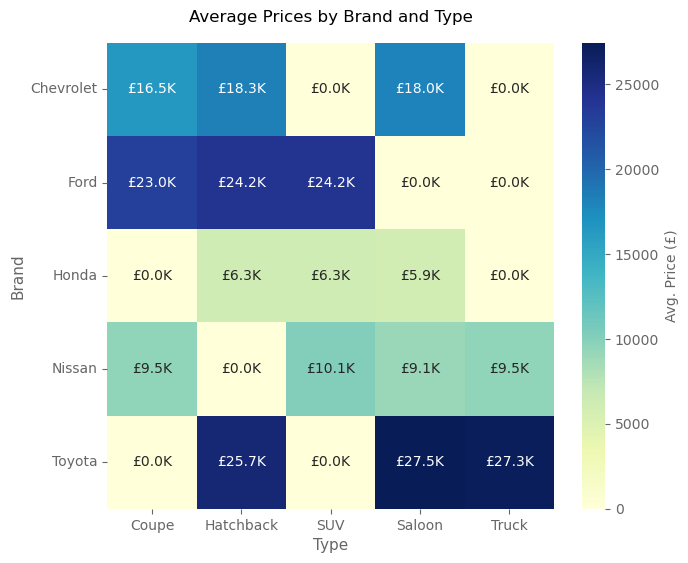

In [72]:
plot_avg_price_heatmap(df_eda, row_col='Made', col_col='Body', figsize=(7, 5.8))
plt.title('Average Prices by Brand and Type', pad = 15)           
plt.xlabel('Type')  
plt.ylabel('Brand')  
plt.show()

**Average Prices of `Condition` and `Body`:**

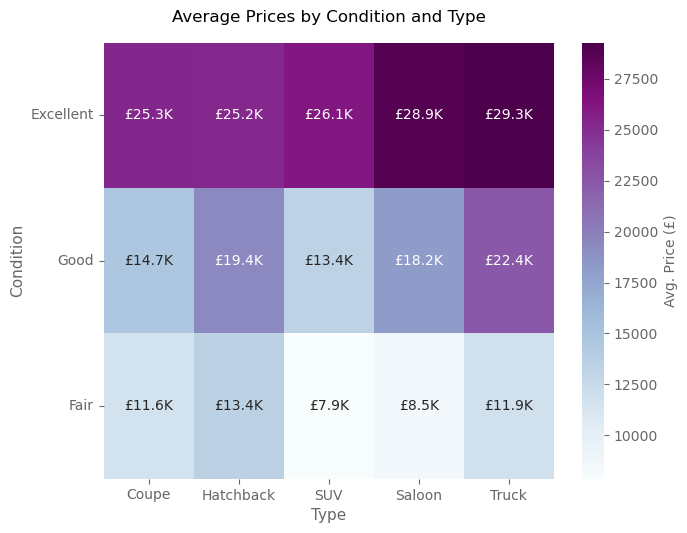

In [73]:
plot_avg_price_heatmap(df_eda, row_col='Condition', 
                       col_col='Body', custom_order = ['Excellent', 'Good', 'Fair'], 
                       figsize=(7, 5.5), cmap='BuPu')
plt.title('Average Prices by Condition and Type', pad = 15)           
plt.xlabel('Type')  
plt.ylabel('Condition')  
plt.show()

**Average Prices of `Used_Years` and `Body`:**

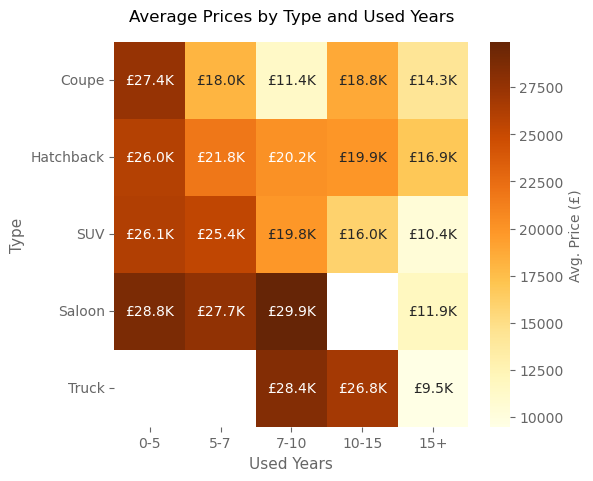

In [74]:
plot_avg_price_heatmap(df_eda, row_col='Body', 
                       col_col='Used_Years', cmap='YlOrBr')
plt.title('Average Prices by Type and Used Years', pad = 15)           
plt.xlabel('Used Years')  
plt.ylabel('Type')  
plt.show()

## 3. Prediction Models

### 3.1 Linear Regegression to Predict Price

In [75]:
# A copy dataset for linear Regression analysis
df_lg = df.copy()

In [76]:
df_lg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Made               2190 non-null   object 
 1   Body               2190 non-null   object 
 2   Year               2190 non-null   int64  
 3   Fuel_Type          2190 non-null   object 
 4   Transmission       2190 non-null   object 
 5   Condition          2190 non-null   object 
 6   Price              2190 non-null   float64
 7   Cylinder_Numbers   2190 non-null   int64  
 8   Engine_Size        2190 non-null   float64
 9   Estimated_Mileage  2190 non-null   float64
 10  Warranty           2190 non-null   int64  
 11  peakrpm            2190 non-null   int64  
 12  Owners             2190 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 222.6+ KB


In [77]:
# Re-initiate the Categoricals and Numericals
cat = ['Made', 'Body', 'Fuel_Type', 'Condition', 'Transmission'] # Categorical
num = [col for col in df_lg.columns if col not in cat] 

#### 3.1.1. Correlation Matrix

##### Prepare the categorical variables: 

In [78]:
cat

['Made', 'Body', 'Fuel_Type', 'Condition', 'Transmission']

In [79]:
# Mapping Condition to Numeric
cond_map = {'Fair'      : 1,
            'Good'      : 2,
            'Excellent' : 3}
# Apply the mapping
df_lg['condition_encode'] = df['Condition'].map(cond_map)
# Drop 'Condition'
df_lg.drop(columns = 'Condition', inplace = True)

# Update Categorical and Numerical
cat = ['Made', 'Body', 'Fuel_Type', 'Transmission'] # Categorical
num = [col for col in df_lg.columns if col not in cat]

# Create the encoder
encoder_corr = OneHotEncoder(sparse_output=False) 
encoded_data_corr = encoder_corr.fit_transform(df_lg[cat])
encoded_df_corr = pd.DataFrame(encoded_data_corr, columns=encoder_corr.get_feature_names_out(cat))
df_lg = pd.concat([df_lg.drop(columns=cat), encoded_df_corr], axis=1)

In [80]:
# Safe a copy of the Encoded Dataset
df_encode = df_lg.copy()

# Make a encode file
df_encode.to_csv('neural_network_data.csv', index=False)

# Make a copy for NN Dataset
df_nn = df_lg.copy()

# Drop Dummy variables with the most observations (Multicolinearity Addressing)
dummy_drop = ['Made_Toyota', 'Body_Hatchback', 'Fuel_Type_Petrol', 'Transmission_Manual']
df_lg.drop(columns = dummy_drop, inplace = True)

# Reorder columns to make 'Price' the first column
df_lg = df_lg[['Price'] + [col for col in df_lg.columns if col != 'Price']]

##### The Correlation Matrix:

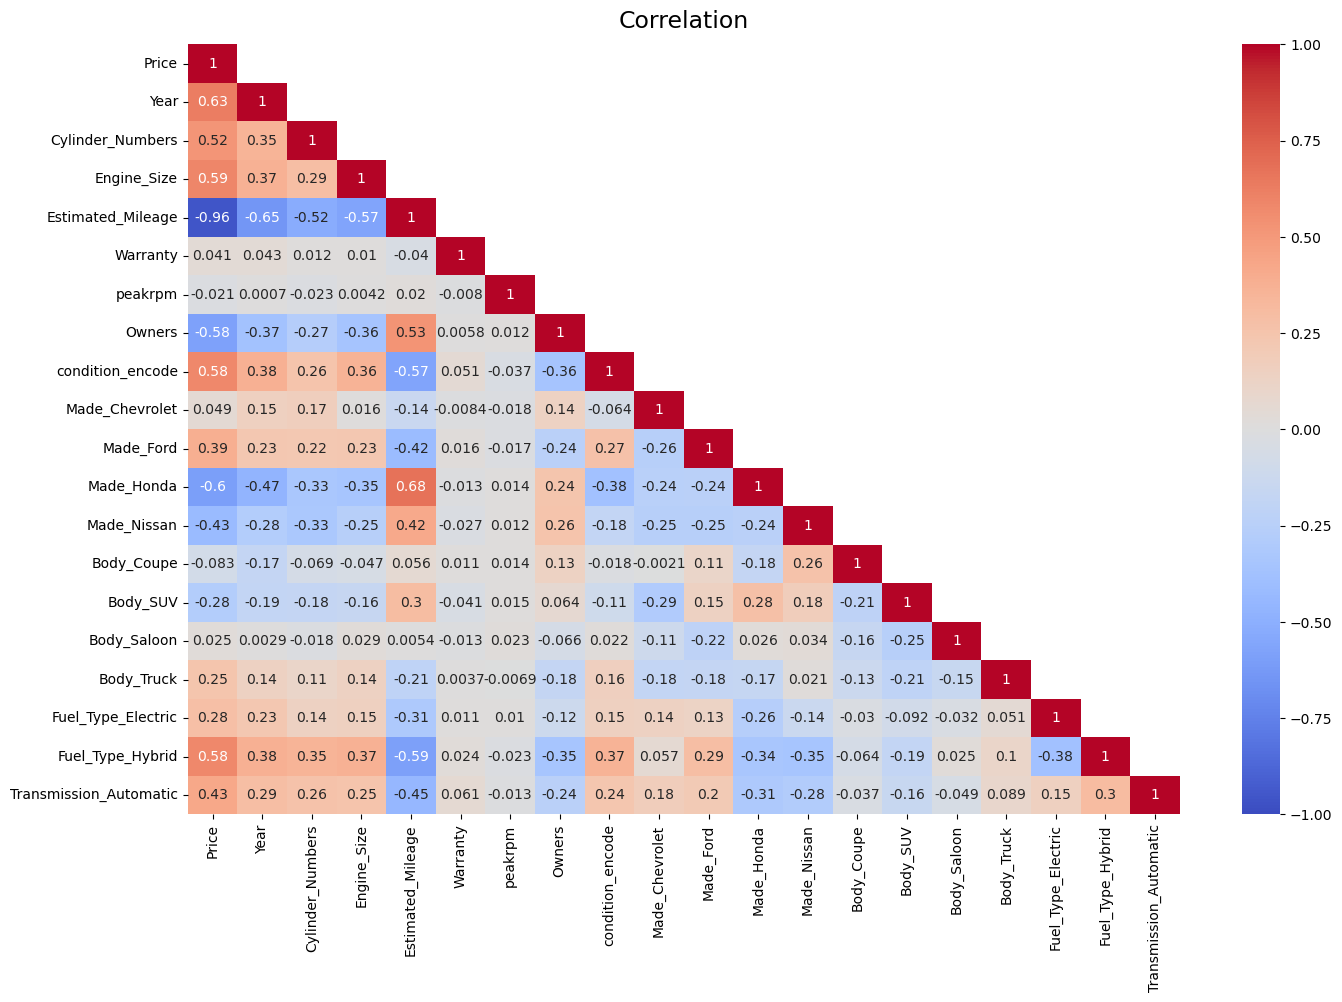

In [81]:
# Calculate the correlation matrix
corr_matrix = df_lg.corr()

# Calculate the correlation matrix
corr_matrix = df_lg.corr()

# Mask the lower half of the correlation matrix but keep the diagonal (1.0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot the heatmap for the upper half, including the diagonal
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation', fontsize=17, pad=12)
plt.show()

#### 3.1.2. The Linear Regression Model to estimate Price: 

Dependent and Independent Variables:

In [82]:
# Define Dependent and Independent Variables
price = 'Price'  # Target variable
predictors = [col for col in df_lg.columns if col != price]  

# Separate the data into X (features) and y (target)
X = df_lg[predictors]  # Features (independent variables)
y = df_lg[price]  # Target (dependent variable)

##### The Baseline Model with all available Predictors:

In [83]:
def linear_reg(dependent, indipendent):
    ''' This function fits the Linear Regression OLS model

    Arguments:
        dependent -- dependent (predicted) variariable
        indipendent -- independent (predictor) variariables

    Returns:
        summary table of the trained model
    '''
        
    X_OLS = indipendent
    y_OLS = dependent

    # OLS model
    X_OLS = sm.add_constant(X_OLS)
    model_OLS = sm.OLS(y_OLS,X_OLS)
    results_OLS = model_OLS.fit()

    return results_OLS.summary()

In [84]:
# The Baseline Model
linear_reg(y, X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1644.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:01:00   Log-Likelihood:                -20009.
No. Observations:                2190   AIC:                         4.006e+04
Df Residuals:                    2170   BIC:                         4.017e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.863e+04   2.32e+04     -1.231      0.218   -7.42e+04     1.7e+04
Year                      29.1017     11.534      2.523      0.012       6.482      51.721
Cylinder_Numbers         246.6484     42.367      5.822      0.000     163.564     329.733
Engine_Size             1154.6743    152.932      7.550      0.000     854.766    1454.583
Estimated_Mileage         -0.6019      0.013    -46.470      0.000      -0.627      -0.577
Warranty                   2.2154      5.764      0.384      0.701      -9.087      13.518
peakrpm                   -0.0500      0.067     -0.748      0.455      -0.181       0.081
Owners                  -606.9428     59.165    -10.258      0.000    -722.969    -490.917
condition_encode         476.6224     94.244      5.057      0.000     291.804     661.441
Made_Chevrolet         -2327.3983    213.599    -10.896      0.000   -2746.278   -1908.519
Made_Ford              -1213.1430    192.577     -6.300      0.000   -1590.797    -835.489
Made_Honda              -670.5550    384.398     -1.744      0.081   -1424.382      83.272
Made_Nissan            -1722.7697    314.534     -5.477      0.000   -2339.589   -1105.950
Body_Coupe               138.0317    180.754      0.764      0.445    -216.438     492.501
Body_SUV                  -7.9826    148.817     -0.054      0.957    -299.821     283.856
Body_Saloon              145.1708    167.032      0.869      0.385    -182.388     472.730
Body_Truck               358.7736    205.544      1.745      0.081     -44.310     761.857
Fuel_Type_Electric       130.8696    186.017      0.704      0.482    -233.921     495.660
Fuel_Type_Hybrid         156.6750    196.106      0.799      0.424    -227.901     541.251
Transmission_Automatic   101.0536    122.040      0.828      0.408    -138.275     340.382
==============================================================================
Omnibus:                      667.226   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3828.719
Skew:                           1.314   Prob(JB):                         0.00
Kurtosis:                       8.921   Cond. No.                     1.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Significant variables (`p < 0.05`):
- `Year`
- `Cylinder_Numbers`
- `Engine_Size`
- `Estimated_Mileage`
- `Owners`
- `condition_encode`
- `Made_Chevrolet`
- `Made_Ford`
- `Made_Honda`
- `Made_Nissan`

##### The Parsimonious Linear Regression Model to Estimate Price:

In [85]:
# Significance Predictors
sig_predictor = ['Year', 'Cylinder_Numbers',
                 'Engine_Size', 'Estimated_Mileage', 
                 'Owners', 'condition_encode', 
                 'Made_Chevrolet', 'Made_Ford', 'Made_Honda',
                 'Made_Nissan']

# Define Dependent and Independent Variables
price = 'Price'  # Target variable

# Separate the data into X (features) and y (target)
X = df_lg[sig_predictor]  # Features (independent variables)
y = df_lg[price]  # Target (dependent variable)

The Most Parsimonious Model:

In [86]:
# The Most Parsimonious Model
linear_reg(y, X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3128.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:01:00   Log-Likelihood:                -20012.
No. Observations:                2190   AIC:                         4.005e+04
Df Residuals:                    2179   BIC:                         4.011e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.426e+04   2.28e+04     -1.066      0.287   -6.89e+04    2.04e+04
Year                 27.0090     11.288      2.393      0.017       4.873      49.145
Cylinder_Numbers    248.8203     42.237      5.891      0.000     165.992     331.649
Engine_Size        1158.3351    152.621      7.590      0.000     859.037    1457.633
Estimated_Mileage    -0.6045      0.012    -48.387      0.000      -0.629      -0.580
Owners             -609.2132     58.729    -10.373      0.000    -724.383    -494.043
condition_encode    489.1452     93.640      5.224      0.000     305.513     672.777
Made_Chevrolet    -2512.7294    182.738    -13.750      0.000   -2871.088   -2154.371
Made_Ford         -1388.8192    153.617     -9.041      0.000   -1690.071   -1087.568
Made_Honda         -968.3379    357.467     -2.709      0.007   -1669.349    -267.326
Made_Nissan       -1933.3139    289.655     -6.675      0.000   -2501.342   -1365.286
==============================================================================
Omnibus:                      667.776   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3836.927
Skew:                           1.314   Prob(JB):                         0.00
Kurtosis:                       8.928   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model Evaluations:

Split Training (80%) and Testing set (20%):

In [87]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and Score the Model using Sklearn.linear_model:

In [88]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = model.predict(X_train)  # Predictions for the training set
y_test_pred = model.predict(X_test)  # Predictions for the test set

**Performance Metrics:**

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Output the results
print(f"Mean Absolute Error on Training Set: {mae_train}")
print(f"Mean Absolute Error on Test Set: {mae_test}")

# Calculate MSE for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Output the MSE results
print(f"Mean Squared Error on Training Set: {mse_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")

# Calculate R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)

# Output the R-squared results
print(f"R-squared on Training Set: {r2_train}")
print(f"R-squared on Test Set: {r2_test}")


Mean Absolute Error on Training Set: 1603.69820197575
Mean Absolute Error on Test Set: 1616.069931915161
Mean Squared Error on Training Set: 4958210.036933449
Mean Squared Error on Test Set: 5526367.953569739
R-squared on Training Set: 0.9365119623813589
R-squared on Test Set: 0.9277239249612316


**Visualisations of Model Evaluations:**

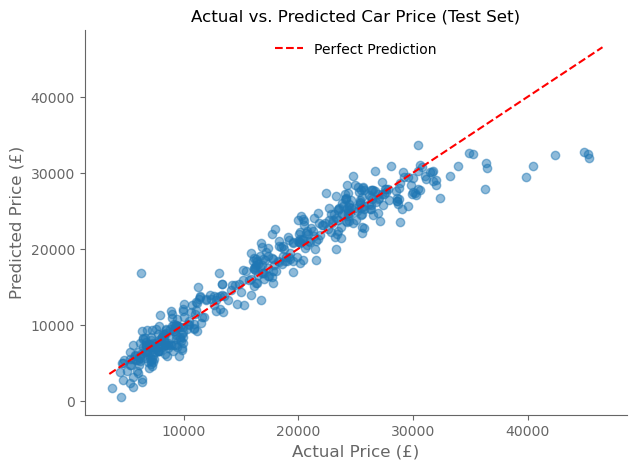

In [90]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label = 'Perfect Prediction')  # Line for perfect prediction  
plot_props(title        = 'Actual vs. Predicted Car Price (Test Set)',
           title_size   = 12,
           x_label      = 'Actual Price (£)',
           y_label      = 'Predicted Price (£)',
           lgn_loc      = 'upper center') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


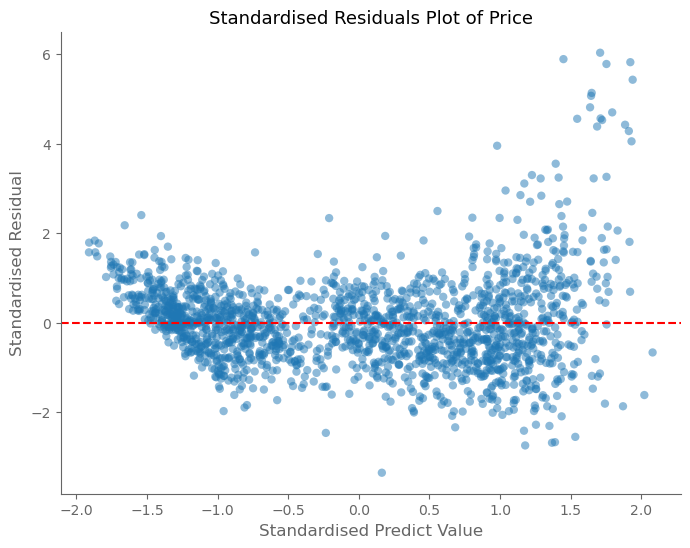

In [91]:
# Predict values and calculate residuals
residuals = y_train - y_train_pred

# Standardize the residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Standardize the predicted values
standardized_predicted_values = (y_train_pred - np.mean(y_train_pred)) / np.std(y_train_pred)

# Residual plot
plt.figure(figsize=(8, 6))
# Create scatter plot with no border and transparency
sns.scatterplot(x           = standardized_predicted_values, 
                y           = standardized_residuals, 
                edgecolor   = 'none',  
                alpha       = 0.5)  
plt.axhline(y=0, color='red', linestyle='--')
plot_props(title        = 'Standardised Residuals Plot of Price',
           title_size   = 13,
           x_label      = 'Standardised Predict Value',
           y_label      = 'Standardised Residual',
           lgn_loc      = 'upper center') 


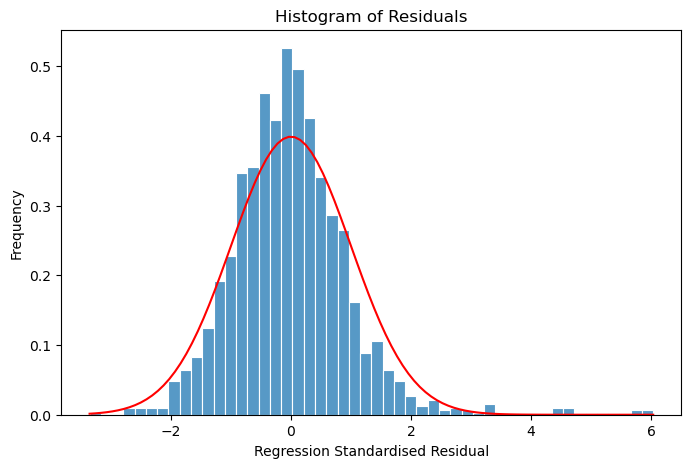

In [92]:
# Fit a normal distribution to the data
mean_res = np.mean(standardized_residuals)
std_dev_res = np.std(standardized_residuals)

# Generate x values for the normal curve
x_res = np.linspace(min(standardized_residuals), max(standardized_residuals), 100)

# Calculate the y values for the normal distribution
y_res = stats.norm.pdf(x_res, mean_res, std_dev_res)
plt.figure(figsize=(8, 5))
sns.histplot(standardized_residuals, kde=False, stat='density', edgecolor = 'white')
# Plot the normal curve
plt.plot(x_res, y_res, color='red', label="Normal Curve")
plt.xlabel('Regression Standardised Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

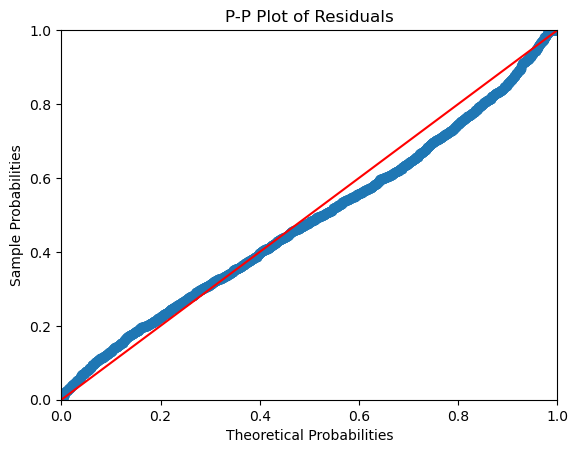

In [93]:
# Compute the standardized residuals
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)

# Create the P-P plot
sm.ProbPlot(residuals_standardized).ppplot(line='45', linestyle = '--')

# Add title
plt.title("P-P Plot of Residuals")
plt.show()

In [94]:
stat, p_value = stats.shapiro(residuals_standardized)
print("Shapiro-Wilk Test: p-value =", p_value)

if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are NOT normally distributed.")

Shapiro-Wilk Test: p-value = 1.9678665915546779e-28
Residuals are NOT normally distributed.


### 3.2. Neural Network Model to predict Price

#### 3.2.1. Base Model

In [95]:
# Features and target variable
X = df_nn.drop(columns=['Price'])  # Drop the target column
y = df_nn['Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Neural Network (MLP Regressor)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predictions on training set
y_train_pred = mlp.predict(X_train_scaled)

# Predictions on test set
y_test_pred = mlp.predict(X_test_scaled)

# Training set MSE, MAE, R²
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test set MSE, MAE, R²
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"  MSE: {mse_train:.2f}")
print(f"  MAE: {mae_train:.2f}")
print(f"  R²: {r2_train:.4f}")

print("\nTest Set:")
print(f"  MSE: {mse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")
print(f"  R²: {r2_test:.4f}")

Training Set:
  MSE: 15822201.32
  MAE: 2992.61
  R²: 0.7974

Test Set:
  MSE: 14535816.15
  MAE: 2947.40
  R²: 0.8099


c:\Users\blueb\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3.2.2. Fine-tuned Model

In [96]:
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 100)],  # Two layers
    'max_iter': [1000, 2000],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1000}


In [97]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1000}


In [98]:
# Predict on training set using the best model
y_train_pred = best_model.predict(X_train_scaled)

# Predict on test set using the best model
y_test_pred = best_model.predict(X_test_scaled)

# Training set MSE, MAE, R²
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test set MSE, MAE, R²
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"  MSE: {mse_train:.2f}")
print(f"  MAE: {mae_train:.2f}")
print(f"  R²: {r2_train:.4f}")

print("\nTest Set:")
print(f"  MSE: {mse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")
print(f"  R²: {r2_test:.4f}")

Training Set:
  MSE: 2900484.07
  MAE: 1158.54
  R²: 0.9629

Test Set:
  MSE: 4470115.76
  MAE: 1445.87
  R²: 0.9415


Using 1752 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/438 [00:00<?, ?it/s]

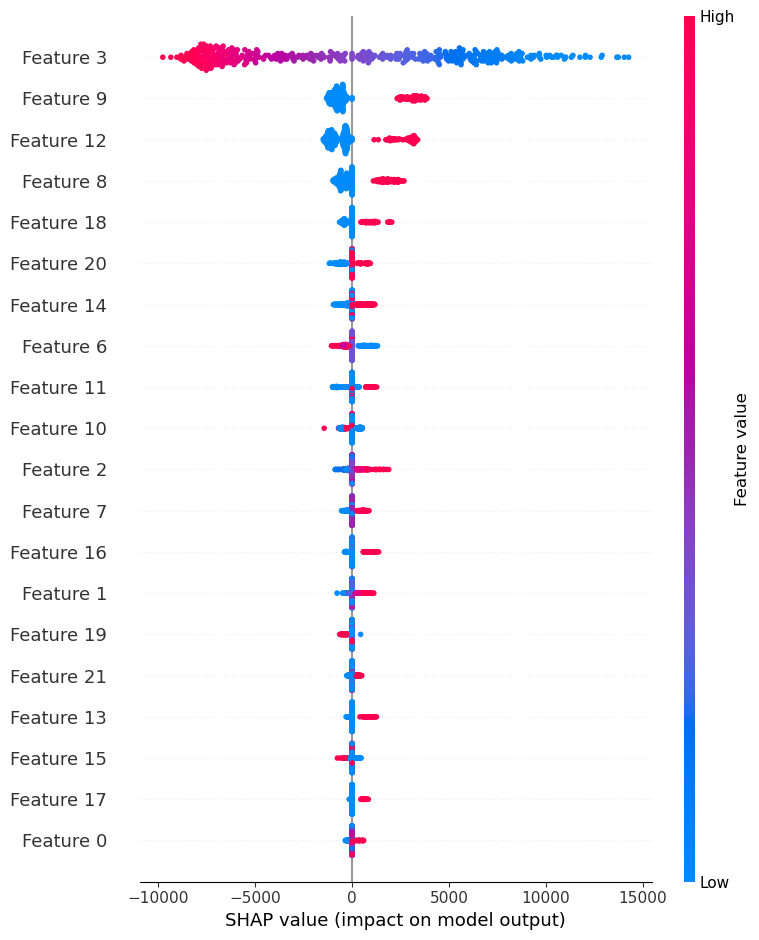

In [99]:
# Assuming best_model is your trained neural network model

# Create a SHAP explainer
explainer = shap.KernelExplainer(best_model.predict, X_train_scaled)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled)

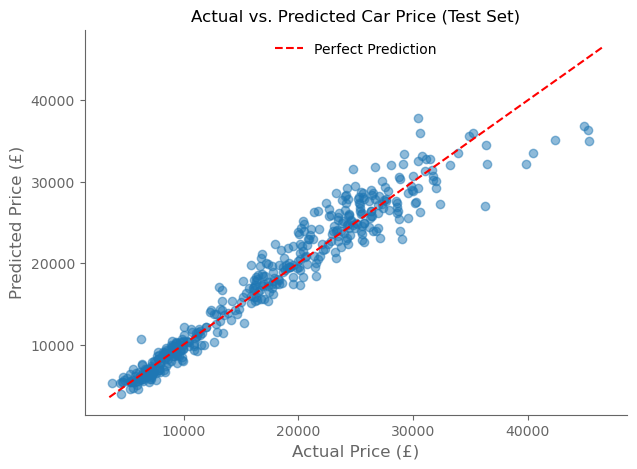

In [100]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label = 'Perfect Prediction')  # Line for perfect prediction  
plot_props(title        = 'Actual vs. Predicted Car Price (Test Set)',
           title_size   = 12,
           x_label      = 'Actual Price (£)',
           y_label      = 'Predicted Price (£)',
           lgn_loc      = 'upper center') 

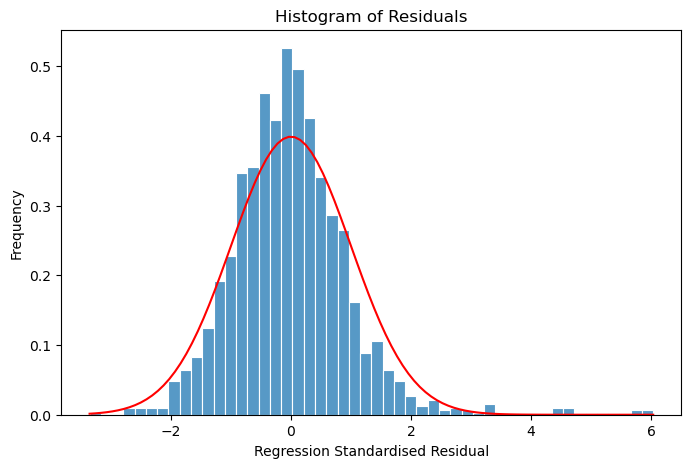

In [101]:
# Predict values and calculate residuals
residuals = y_train - y_train_pred

# Fit a normal distribution to the data
mean_res = np.mean(standardized_residuals)
std_dev_res = np.std(standardized_residuals)

# Generate x values for the normal curve
x_res = np.linspace(min(standardized_residuals), max(standardized_residuals), 100)

# Calculate the y values for the normal distribution
y_res = stats.norm.pdf(x_res, mean_res, std_dev_res)
plt.figure(figsize=(8, 5))
sns.histplot(standardized_residuals, kde=False, stat='density', edgecolor = 'white')
# Plot the normal curve
plt.plot(x_res, y_res, color='red', label="Normal Curve")
plt.xlabel('Regression Standardised Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## 4. Clustering Model

### 4.1. Hierachical Model

**The Dedogram:**

In [102]:
# Drop Dummy variables with the most observations (If don't drop one dummy, the algorithm may give inflated importance to that feature)
dummy_drop = ['Made_Toyota', 'Body_Hatchback', 'Fuel_Type_Petrol', 'Transmission_Manual']
df_encode.drop(columns = dummy_drop, inplace = True)
df_encode

,Year,Price,Cylinder_Numbers,Engine_Size,Estimated_Mileage,Warranty,peakrpm,Owners,condition_encode,Made_Chevrolet,Made_Ford,Made_Honda,Made_Nissan,Body_Coupe,Body_SUV,Body_Saloon,Body_Truck,Fuel_Type_Electric,Fuel_Type_Hybrid,Transmission_Automatic
0,2007,8005.469674,2,1.655688,36245.69700,7,6000,2,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2019,25385.241860,2,2.696626,10736.91127,20,4689,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2004,6553.601733,3,1.642471,41953.92523,12,5190,4,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,24381.083350,3,2.044309,12446.97569,8,5720,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2017,28357.830640,5,2.586011,10560.54904,35,4559,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2013,15164.228470,2,2.238645,24612.10317,11,4685,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2186,2007,6250.307375,2,2.283821,35581.95722,32,4977,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2187,2012,21614.535620,4,2.355598,15609.82872,30,5891,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2188,2003,8373.305539,3,1.944553,36638.12130,26,4502,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


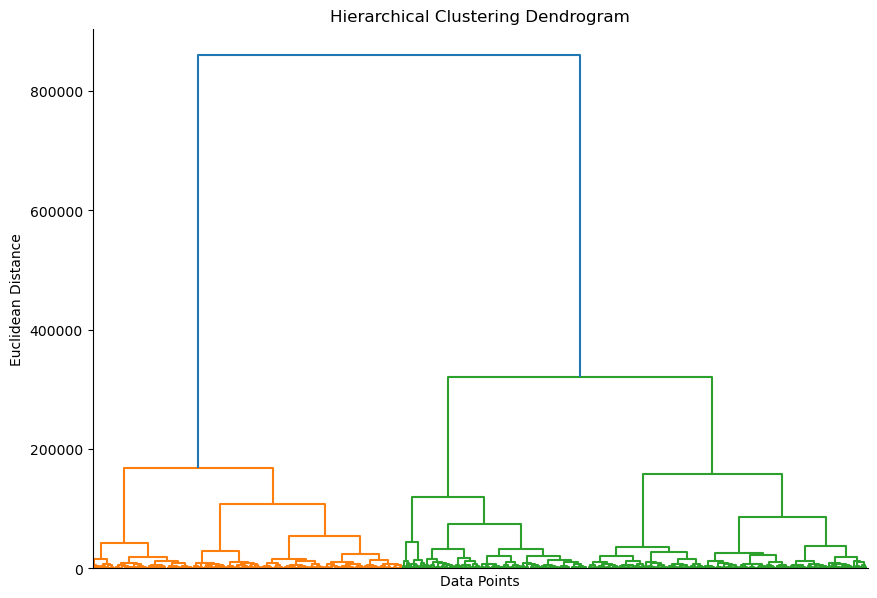

In [103]:
#Create and plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_encode, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xticks([]) # Disable xticks
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
sns.despine()
plt.show()

**Find the best `Agglomerative Hierarchical Clustering` Method:**

In [104]:
# Agglomerative Hierarchical Clustering Parameters
hc_al = {'n_cluster'  : [2, 3, 4, 5, 6, 7],
         'metric'     : ['euclidean', 'manhattan', 'cosine'],
         'linkage'    : ['ward', 'complete', 'average', 'single']}

# The Random Subset of 30% Data
hc_subset = df_encode.sample(frac         = 0.4, 
                            random_state = 42)

# The Dataframe of resuslts
df_hc_al = pd.DataFrame(columns=['Clusters', 'Metric', 'Linkage', 'Silhouette'])

# Perform the Clustering with all combinations
for n_cluster in hc_al['n_cluster']:
    for metric in hc_al['metric']:
        for linkage in hc_al['linkage']:
            
            # Ward's linkage only works with Euclidean Distance 
            if metric != 'euclidean' and linkage == 'ward':
                continue
            else:
                hc = AgglomerativeClustering(n_clusters = n_cluster, 
                                             metric     = metric, 
                                             linkage    = linkage)
                hrc_clusters = hc.fit_predict(hc_subset)
                
                silhouette_avg_hc = silhouette_score(hc_subset, hrc_clusters)
                
                # Create a DataFrame for the new row
                new_row = pd.DataFrame({'Clusters'   : [n_cluster], 
                                        'Metric'     : [metric], 
                                        'Linkage'    : [linkage],
                                        'Silhouette' : [silhouette_avg_hc]})

                # Concatenate the new row to the original DataFrame
                df_hc_al = pd.concat([df_hc_al, new_row], ignore_index=True)

In [105]:
# Records of Highest Silhouettes
df_hc_al.nlargest(5, 'Silhouette')

,Clusters,Metric,Linkage,Silhouette
0,2,euclidean,ward,0.672324
5,2,manhattan,average,0.665801
2,2,euclidean,average,0.627555
7,2,cosine,complete,0.612905
4,2,manhattan,complete,0.611120


**Based on the results above, the best `Agglomerative Hierachical Clustering` Model:**

- Number of Clusters: 2
- Distance metric: cosine
- Linkage method: average

OR:

- Number of Clusters: 3
- Distance metric: Manhattan
- Linkage method: average

In [106]:
### Apply Hierarchical Clustering on the complete dataset###

# 2 Clusters
hc2 = AgglomerativeClustering(n_clusters = 2, 
                              metric     = 'euclidean', 
                              linkage    = 'ward')
hc_2_clusters = hc2.fit_predict(df_encode)

silhouette_avg_hc_2 = silhouette_score(df_encode, hc_2_clusters)

# Assign cluster labels to a dataset
df_cluster = df.copy()
df_cluster['cluster_2'] = hc_2_clusters

In [107]:
# 3 Clusters
hc3 = AgglomerativeClustering(n_clusters = 3, 
                              metric     = 'manhattan', 
                              linkage    = 'average')
hc_3_clusters = hc3.fit_predict(df_encode)

silhouette_avg_hc_3 = silhouette_score(df_encode, hc_3_clusters)

df_cluster['cluster_3'] = hc_3_clusters

**Cluster Sizes:**

In [108]:
def plot_donut_chart(series, title='Donut Chart', colors=None):
    """
    Plots a donut chart from a pandas Series of counts.
    
    Arguments:
        series -- pandas Series with value counts
        title  -- title of the chart (default: 'Donut Chart')
        colors -- optional list of colours for the wedges
    """
    # Prepare labels and sizes
    labels = [f'Cluster {i}' for i in series.index]
    sizes = series.values
    
    # Plot
    fig, ax = plt.subplots(figsize=(3, 3))
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=colors
    )

    # Add center circle for donut effect
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    # Formatting
    ax.axis('equal')  
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [109]:
df_cluster['cluster_2'].value_counts()

cluster_2
0    1313
1     877
Name: count, dtype: int64

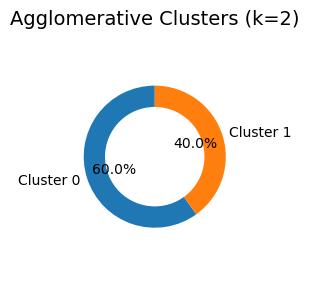

In [110]:
# Get value counts for the 2-cluster solution
hc2_counts = df_cluster['cluster_2'].value_counts().sort_index()

# Plot the donut chart
plot_donut_chart(hc2_counts, title='Agglomerative Clusters (k=2)')


In [111]:
df_cluster['cluster_3'].value_counts()

cluster_3
0    1251
1     917
2      22
Name: count, dtype: int64

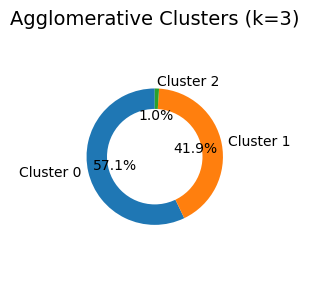

In [112]:
# Get value counts for the 2-cluster solution
hc3_counts = df_cluster['cluster_3'].value_counts().sort_index()

# Plot the donut chart
plot_donut_chart(hc3_counts, title='Agglomerative Clusters (k=3)')


**Silhouette Score:**

In [113]:
# The Silhouette Score
print(f'[2 Clusters] Silhouette Score: {silhouette_avg_hc_2:.4f}')
print(f'[3 Clusters] Silhouette Score: {silhouette_avg_hc_3:.4f}')

[2 Clusters] Silhouette Score: 0.6606
[3 Clusters] Silhouette Score: 0.5843


In [114]:
df_cluster

,Made,Body,Year,Fuel_Type,Transmission,Condition,Price,Cylinder_Numbers,Engine_Size,Estimated_Mileage,Warranty,peakrpm,Owners,cluster_2,cluster_3
0,Nissan,Saloon,2007,Petrol,Manual,Fair,8005.469674,2,1.655688,36245.69700,7,6000,2,1,1
1,Toyota,Saloon,2019,Electric,Manual,Excellent,25385.241860,2,2.696626,10736.91127,20,4689,1,0,0
2,Honda,SUV,2004,Petrol,Manual,Fair,6553.601733,3,1.642471,41953.92523,12,5190,4,1,1
3,Toyota,Saloon,2020,Electric,Manual,Good,24381.083350,3,2.044309,12446.97569,8,5720,1,0,0
4,Toyota,Truck,2017,Hybrid,Automatic,Good,28357.830640,5,2.586011,10560.54904,35,4559,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Chevrolet,Hatchback,2013,Electric,Automatic,Good,15164.228470,2,2.238645,24612.10317,11,4685,4,0,0
2186,Honda,Hatchback,2007,Petrol,Manual,Good,6250.307375,2,2.283821,35581.95722,32,4977,2,1,1
2187,Chevrolet,Hatchback,2012,Hybrid,Automatic,Excellent,21614.535620,4,2.355598,15609.82872,30,5891,1,0,0
2188,Nissan,Truck,2003,Petrol,Manual,Good,8373.305539,3,1.944553,36638.12130,26,4502,3,1,1


**Averages between Clusters:**

In [115]:
def cluster_compare(df, var):
    '''_summary_

    Arguments:
        df -- _description_
        var -- _description_

    Returns:
        _description_
    '''

    # Categorical values
    categoricals = ['Made', 'Fuel_Type', 'Transmission', 'Condition']

    # Numerical values
    numericals = ['Year', 'Price', 'Cylinder_Numbers', 'Estimated_Mileage', 'Warranty', 'peakrpm', 'Owners']
    
    # Averages between Clusters
    avg_diff = df.groupby(var)[numericals].mean()
    avg_diff = avg_diff.applymap(lambda x: f"{x:.2f}")

    # Unqiue counts between Clusters
    unique = df.groupby(var)[categoricals].value_counts()

    return avg_diff, unique

# Compre 2 clusters and 3 clusters
hc2_mean, hc2_unique =  cluster_compare(df_cluster, 'cluster_2')
hc3_mean, hc3_unique =  cluster_compare(df_cluster, 'cluster_3')


In [116]:
# 2 Cluster means
hc2_mean

,Year,Price,Cylinder_Numbers,Estimated_Mileage,Warranty,peakrpm,Owners
cluster_2,,,,,,,
0,2012.50,23235.45,4.05,15130.49,19.99,5323.49,2.10
1,2005.52,8106.47,2.55,36911.93,19.37,5370.73,2.98


In [117]:
# 3 Clusters means
hc3_mean

,Year,Price,Cylinder_Numbers,Estimated_Mileage,Warranty,peakrpm,Owners
cluster_3,,,,,,,
0,2012.54,23202.77,4.05,14954.15,20.08,5330.42,2.09
1,2005.74,8334.94,2.58,36439.12,19.32,5359.86,2.97
2,2013.91,43077.35,5.82,5263.28,18.14,5296.41,1.00


**Percentages of Cars based on their characteristics in each Cluster:**

In [118]:
def cluster_percent(df, col):
    '''_summary_

    Arguments:
        df -- _description_
        col -- _description_
    '''

    # Categorical values
    categoricals = ['Made', 'Fuel_Type', 'Transmission', 'Condition']

    # Dictionary to store results
    percentage_results = {}

    # Loop through categorical variables and calculate percentages
    for cat in categoricals:
        percentage_results[cat] = (
            df[[cat, col]]
            .groupby(col)[cat]
            .value_counts(normalize=True) * 100
        )
        
    # Display all results
    for cat, result in percentage_results.items():
        print(f"### Percentage Distribution for {cat} ###")
        print(result.apply(lambda x: f"{x:.0f}%"), "\n") 


In [119]:
# Show the percentages in each Cluster     
cluster_percent(df_cluster, 'cluster_2')

### Percentage Distribution for Made ###
cluster_2  Made     
0          Toyota       34%
           Ford         34%
           Chevrolet    31%
           Nissan        1%
           Honda         0%
1          Nissan       49%
           Honda        47%
           Chevrolet     4%
           Toyota        0%
Name: proportion, dtype: object 

### Percentage Distribution for Fuel_Type ###
cluster_2  Fuel_Type
0          Hybrid       55%
           Electric     33%
           Petrol       12%
1          Petrol       94%
           Electric      6%
           Hybrid        0%
Name: proportion, dtype: object 

### Percentage Distribution for Transmission ###
cluster_2  Transmission
0          Manual          53%
           Automatic       47%
1          Manual          98%
           Automatic        2%
Name: proportion, dtype: object 

### Percentage Distribution for Condition ###
cluster_2  Condition
0          Good         62%
           Excellent    26%
           Fair         12%
1

In [120]:
# Show the percentages in each Cluster     
cluster_percent(df_cluster, 'cluster_3')

### Percentage Distribution for Made ###
cluster_3  Made     
0          Ford         35%
           Toyota       34%
           Chevrolet    31%
           Nissan        0%
1          Nissan       48%
           Honda        45%
           Chevrolet     6%
           Toyota        1%
           Ford          0%
2          Toyota       86%
           Ford         14%
Name: proportion, dtype: object 

### Percentage Distribution for Fuel_Type ###
cluster_3  Fuel_Type
0          Hybrid       56%
           Electric     34%
           Petrol       10%
1          Petrol       92%
           Electric      7%
           Hybrid        0%
2          Hybrid       77%
           Electric     23%
Name: proportion, dtype: object 

### Percentage Distribution for Transmission ###
cluster_3  Transmission
0          Manual          53%
           Automatic       47%
1          Manual          97%
           Automatic        3%
2          Automatic       50%
           Manual          50%
Name: propor

### 4.2. Kmeans Clustering

**Elbow Method to choose the number of Clusters:**

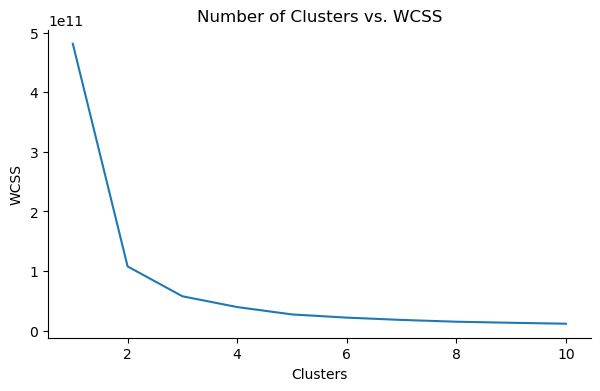

In [121]:
### Determine the number of clusters (using Elbow method) ###

wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):  # Cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    
    kmeans.fit(df_encode)  # Fit the KMeans algorithm
    wcss.append(kmeans.inertia_)

#Plot the Elbow curve to choose the optimal number of clusters
plt.figure(figsize = (7, 4))
plt.plot(range(1, 11), wcss)
plt.title('Number of Clusters vs. WCSS')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

**K-means Clustering on the Dataset:**

In [122]:
# K-Means clustering settings
kmeans_2 = KMeans(n_clusters   = 2, 
                init         = 'k-means++', 
                max_iter     = 300, 
                n_init       = 'auto', 
                random_state = 42,
                tol          = 1e-7)

kmeans_3 = KMeans(n_clusters   = 3, 
                init         = 'k-means++', 
                max_iter     = 300, 
                n_init       = 'auto', 
                random_state = 42,
                tol          = 1e-7)


# Perform clustering
kmean_2_clusters = kmeans_2.fit_predict(df_encode)
kmean_3_clusters = kmeans_3.fit_predict(df_encode)


# New Dataset to store clustering results
df_km_clusters = df.copy()

# Assign the cluster labels 
df_km_clusters['km_2_cluster'] = kmean_2_clusters
df_km_clusters['km_3_cluster'] = kmean_3_clusters

**Cluster Sizes:**

In [123]:
# Number of Customers in each Cluster: 2
df_km_clusters['km_2_cluster'].value_counts()

km_2_cluster
0    1247
1     943
Name: count, dtype: int64

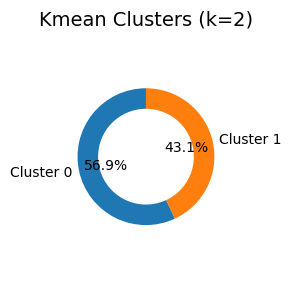

In [124]:
# Get value counts for the 2-cluster solution
km2_counts = df_km_clusters['km_2_cluster'].value_counts().sort_index()

# Plot the donut chart
plot_donut_chart(km2_counts, title='Kmean Clusters (k=2)')

In [125]:
# Number of Customers in each Cluster: 3
df_km_clusters['km_3_cluster'].value_counts()

km_3_cluster
1    853
2    704
0    633
Name: count, dtype: int64

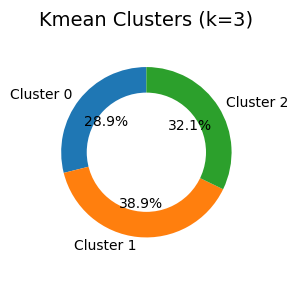

In [126]:
# Get value counts for the 2-cluster solution
km3_counts = df_km_clusters['km_3_cluster'].value_counts().sort_index()

# Plot the donut chart
plot_donut_chart(km3_counts, title='Kmean Clusters (k=3)')

**Silhouette Score:**

In [127]:
silhouette_avg_2_kmean = silhouette_score(df_encode, kmean_2_clusters)
silhouette_avg_3_kmean = silhouette_score(df_encode, kmean_3_clusters)


print(f'[2 Clusters] Silhouette Score: {silhouette_avg_2_kmean:.4f}')
print(f'[3 Clusters] Silhouette Score: {silhouette_avg_3_kmean:.4f}')

[2 Clusters] Silhouette Score: 0.6641
[3 Clusters] Silhouette Score: 0.5643


**Averages between Clusters:**

In [128]:
# Averages between Clusters
km_2_mean, km_2_unique =  cluster_compare(df_km_clusters, 'km_2_cluster')
km_3_mean, km_3_unique =  cluster_compare(df_km_clusters, 'km_3_cluster')

In [129]:
# Averages between 2 Clusters
km_2_mean

,Year,Price,Cylinder_Numbers,Estimated_Mileage,Warranty,peakrpm,Owners
km_2_cluster,,,,,,,
0,2012.59,23720.74,4.08,14564.14,20.05,5327.34,2.06
1,2005.90,8523.59,2.62,36136.40,19.34,5362.33,2.96


In [130]:
# Averages between 3 Clusters
km_3_mean

,Year,Price,Cylinder_Numbers,Estimated_Mileage,Warranty,peakrpm,Owners
km_3_cluster,,,,,,,
0,2011.25,18143.14,3.94,20288.49,19.77,5332.23,2.72
1,2005.36,7981.91,2.53,37169.98,19.40,5361.76,2.98
2,2013.58,27449.34,4.13,10922.57,20.13,5328.12,1.57


**Percentages of Cars based on their characteristics in each Cluster:**

In [131]:
# Show the percentages for each Cluster: 2 Clusters
cluster_percent(df_km_clusters, 'km_2_cluster')

### Percentage Distribution for Made ###
km_2_cluster  Made     
0             Toyota       35%
              Ford         35%
              Chevrolet    29%
              Nissan        0%
1             Nissan       46%
              Honda        44%
              Chevrolet     9%
              Toyota        1%
              Ford          1%
Name: proportion, dtype: object 

### Percentage Distribution for Fuel_Type ###
km_2_cluster  Fuel_Type
0             Hybrid       57%
              Electric     33%
              Petrol       10%
1             Petrol       91%
              Electric      8%
              Hybrid        1%
Name: proportion, dtype: object 

### Percentage Distribution for Transmission ###
km_2_cluster  Transmission
0             Manual          53%
              Automatic       47%
1             Manual          96%
              Automatic        4%
Name: proportion, dtype: object 

### Percentage Distribution for Condition ###
km_2_cluster  Condition
0             Go

In [132]:
# Show the percentages for each Cluster: 3 Clusters
cluster_percent(df_km_clusters, 'km_3_cluster')

### Percentage Distribution for Made ###
km_3_cluster  Made     
0             Chevrolet    60%
              Ford         23%
              Toyota       13%
              Nissan        4%
              Honda         0%
1             Nissan       49%
              Honda        48%
              Chevrolet     3%
              Toyota        0%
2             Toyota       52%
              Ford         42%
              Chevrolet     7%
Name: proportion, dtype: object 

### Percentage Distribution for Fuel_Type ###
km_3_cluster  Fuel_Type
0             Hybrid       40%
              Electric     34%
              Petrol       26%
1             Petrol       94%
              Electric      6%
2             Hybrid       66%
              Electric     33%
              Petrol        1%
Name: proportion, dtype: object 

### Percentage Distribution for Transmission ###
km_3_cluster  Transmission
0             Manual          54%
              Automatic       46%
1             Manual          99%